<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/RandomForest/RandomForest_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

导包

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

还是wine的数据集，这里就不做过多的展示了

In [2]:
wine = load_wine() #load wine
y = wine.target #the labels, there are three labels
X = wine.data #the dataset
print(X[0:5])
print(y[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]


分训练集，测试集等.

我们在这里测试一下decision tree model和Random forest model的精确度

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
clf = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)

clf.fit(X_train, y_train)
rfc.fit(X_train, y_train)

score_dec = clf.score(X_test, y_test)
score_ran = rfc.score(X_test, y_test)

print("the decison tree model acc is: {}".format(score_dec),"Random forest model acc is: {}".format(score_ran))

the decison tree model acc is: 0.8888888888888888 Random forest model acc is: 0.9814814814814815


画出random forest和decision tree在一组交叉验证下的效果对比

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#random forest
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, X,y,cv=10)

#decision tree
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, X,y,cv=10)

visualize

<function matplotlib.pyplot.show>

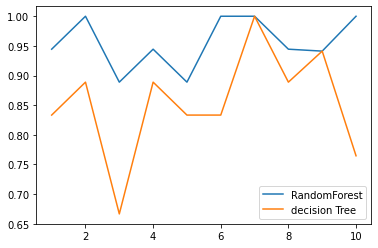

In [ ]:
plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="decision Tree")
plt.legend()
plt.show

图中，我们可以注意到，决策树和random forest有同上同下的趋势。单个决策树的准确率越高，random forest的准确率也会越高

接下来，我们再看看n_estimators对模型精确度的影响

0.9888888888888889 14


<function matplotlib.pyplot.show>

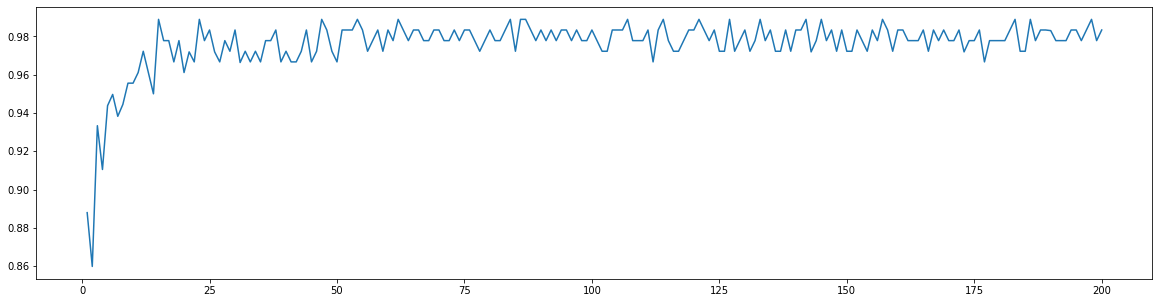

In [ ]:
acc = []
for i in range(200):
  rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
  rfc_s = cross_val_score(rfc, X, y, cv=10).mean()
  acc.append(rfc_s)
print(max(acc),acc.index(max(acc)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),acc)
plt.show

现在，我们来理解一下random forest 中random_state参数

这个random state跟决策树不太一样。在决策树中是保证树是一样的。这里是保证森林是一样的，但是森林里面的决策树还是各不相同的。


In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=2)
rfc.fit(X_train, y_train)

#随机森林的重要属性之一：estimators，可以查看里面决策树的状况
rfc.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1872583848, splitter='best')

这样就可以查看每一棵树的状况

In [ ]:
for i in range(len(rfc.estimators_)):
  print(rfc.estimators_[i])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1872583848, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=794921487, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='aut

In [ ]:
rfc.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

使用oob_score_参数

In [11]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
rfc.fit(X_train,y_train)
print(rfc.predict(X_test))
print(rfc.predict_proba(X_test))
print(rfc.oob_score_)

[1 1 2 2 0 0 1 0 0 1 2 0 1 0 1 1 2 2 1 1 1 1 2 1 1 0 0 1 2 1 1 1 0 1 0 2 0
 2 0 1 1 1 1 0 0 1 0 2 0 0 0 0 1 1]
[[0.04 0.96 0.  ]
 [0.   0.88 0.12]
 [0.   0.08 0.92]
 [0.   0.08 0.92]
 [1.   0.   0.  ]
 [0.92 0.04 0.04]
 [0.12 0.84 0.04]
 [0.52 0.48 0.  ]
 [1.   0.   0.  ]
 [0.12 0.76 0.12]
 [0.08 0.08 0.84]
 [1.   0.   0.  ]
 [0.04 0.48 0.48]
 [1.   0.   0.  ]
 [0.32 0.68 0.  ]
 [0.   0.96 0.04]
 [0.04 0.   0.96]
 [0.04 0.08 0.88]
 [0.4  0.44 0.16]
 [0.04 0.84 0.12]
 [0.08 0.88 0.04]
 [0.   1.   0.  ]
 [0.04 0.04 0.92]
 [0.   1.   0.  ]
 [0.36 0.64 0.  ]
 [0.92 0.   0.08]
 [0.92 0.04 0.04]
 [0.04 0.96 0.  ]
 [0.08 0.12 0.8 ]
 [0.   0.96 0.04]
 [0.   0.96 0.04]
 [0.16 0.72 0.12]
 [0.88 0.08 0.04]
 [0.   0.96 0.04]
 [0.92 0.   0.08]
 [0.   0.24 0.76]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.92 0.04 0.04]
 [0.12 0.68 0.2 ]
 [0.32 0.64 0.04]
 [0.08 0.92 0.  ]
 [0.04 0.88 0.08]
 [1.   0.   0.  ]
 [0.8  0.08 0.12]
 [0.   0.96 0.04]
 [0.92 0.08 0.  ]
 [0.   0.   1.  ]
 [0.88 0.08 0.04]
 [0.92 

In [10]:
rfc.apply(X_test)

array([[ 2, 12,  5, ...,  7, 14, 10],
       [ 7,  3,  4, ...,  5,  5, 15],
       [ 2,  9, 10, ..., 11, 18, 10],
       ...,
       [ 7,  3,  9, ...,  9,  5, 15],
       [10,  9, 10, ..., 12, 18, 20],
       [ 2,  6,  3, ...,  3, 11, 10]])

对于bagging中每一棵decision tree的准确率一定要大于50%，要不然random forest的表现会很差

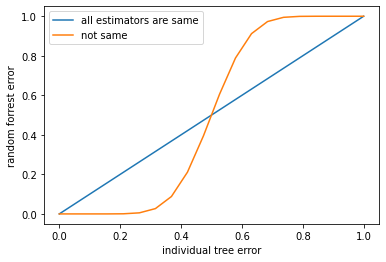

In [16]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

x = np.linspace(0,1,20)
y = []

for epsilon in x:
  E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                 for i in range(13,26)]).sum()
  y.append(E)

plt.plot(x,x,label="all estimators are same")
plt.plot(x,y,label="not same")
plt.xlabel("individual tree error")
plt.ylabel("random forrest error")
plt.legend()
plt.show()


上面这张图也就表明，如果单个decision tree的预测正确率低于50%，那么，random forest的错误率就会非常大